In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import urllib.request, json 
import seaborn as sns
from scipy import stats as sps
import pickle

from src.data_collection import *

from scipy.optimize import curve_fit

In [2]:
confirm = get_global_cases_total()
death = get_global_deaths_total()
recover = get_global_recovers_total()

Global cases (total) by country fetched for 06-28
Global deaths (total) by country fetched for 06-28
Global recovers (total) by country fetched for 06-28


# Italy

In [3]:
pd.to_datetime("today")

Timestamp('2020-06-05 10:43:37.875055')

In [71]:
dates = [i.strftime('%Y%m%d') for i in pd.date_range(start='20200224', end='today')]
italy_regions = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200605.csv').denominazione_regione.unique()

it_en = {'ricoverati_con_sintomi': 'hospitalized with symptoms',
         'terapia_intensiva':'ICU',
         'totale_ospedalizzati':'total hospitalized',
         'isolamento_domiciliare':'home isolation',
         'totale_positivi':'total positive',
         'variazione_totale_positivi':'change in positive',
         'nuovi_positivi':'new positive',
         'dimessi_guariti':'recovered',
         'deceduti':'deceases',
         'totale_casi':'total cases',
         'tamponi':'swabs',
         'casi_testati':'cases tested'}

In [89]:
raw = pd.read_csv(url + dates[0] + '.csv')

for date in dates[1:]:
    raw = raw.append(pd.read_csv(url + date + '.csv'))
    
raw = raw.drop(['stato','lat','long','codice_regione','note_it','note_en'], axis=1).rename(columns=it_en)
raw = raw.set_index('denominazione_regione')
raw.data = pd.to_datetime(raw.data)

In [99]:
raw.to_csv('data/country detailed/GitHub archive/Italy_06_06.csv')

Abruzzo


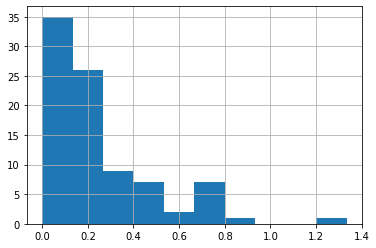

Basilicata


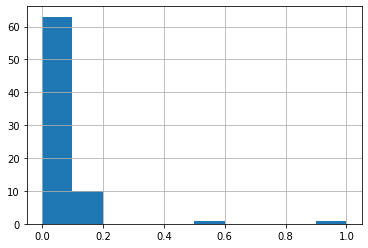

P.A. Bolzano


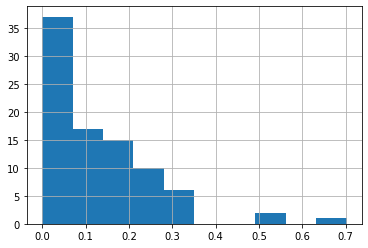

Calabria


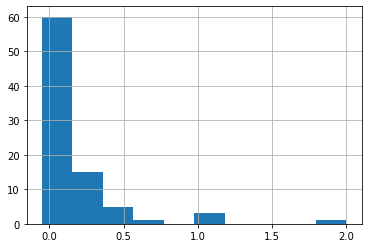

Campania


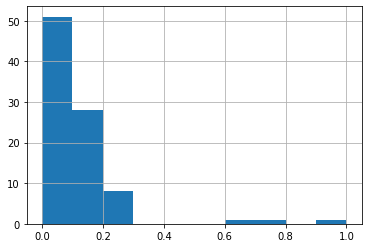

Emilia-Romagna


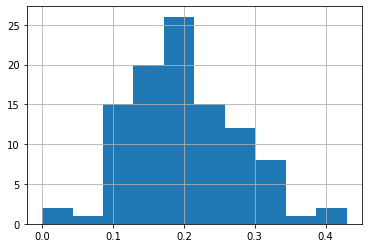

Friuli Venezia Giulia


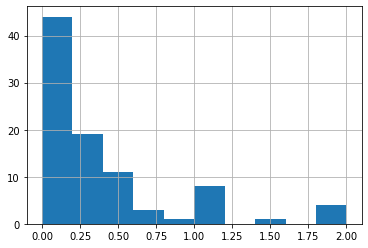

Lazio


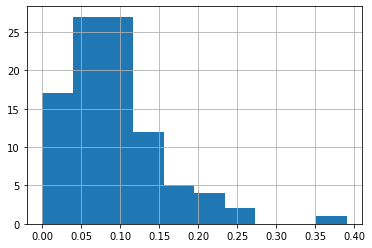

Liguria


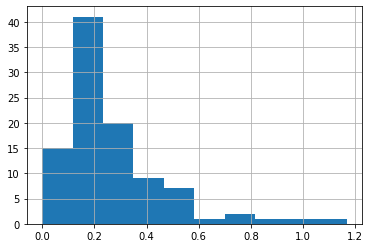

Lombardia


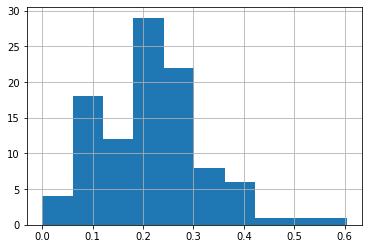

Marche


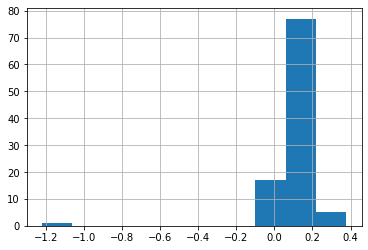

Molise


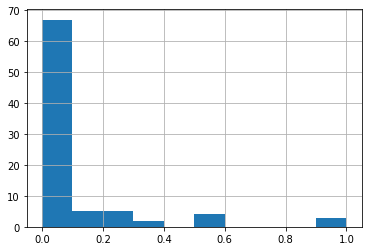

Piemonte


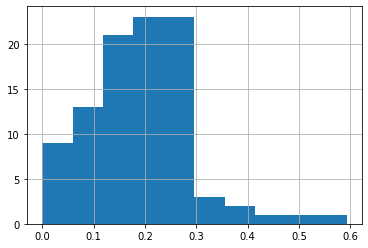

ValueError: supplied range of [0.0, inf] is not finite

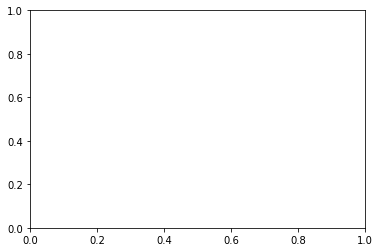

In [106]:
for region in raw.index.unique():
    focus = raw.loc[region]
    (focus.deceases.diff()/focus.ICU).hist(label=region)
    print(region)
    plt.show()

In [218]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

p0 = [max(ydata)+1200, np.median(xdata),1,0] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')

In [223]:
xr = np.linspace(1, 140)
yr = sigmoid(xr, popt[0], popt[1], popt[2], popt[3])

In [231]:
ydata = death['Germany']
# ydata = ydata[ydata > 0]
xdata = ydata.reset_index().index

p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid, xdata, ydata, p0, method='dogbox')

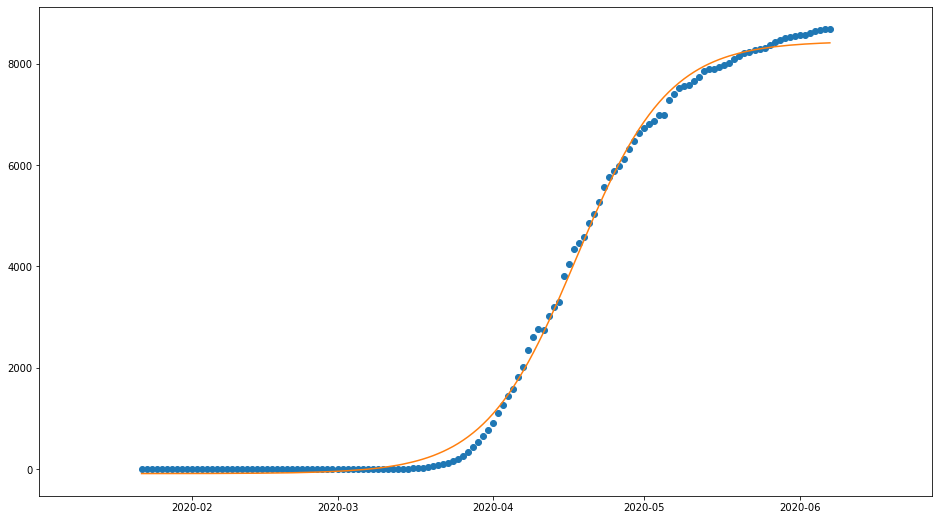

In [229]:
fig, ax = plt.subplots(figsize=(16,9))

ax.scatter(ydata.index, ydata)
ax.plot(ydata.index, sigmoid(xdata, popt[0], popt[1], popt[2], popt[3]).astype(int).to_list(), c='C1')

In [15]:
cfr_t = (death / confirm)[death.columns]
cfr_c = (death / (death + recover))[death.columns]
cfr_o = death  / confirm.shift(14)

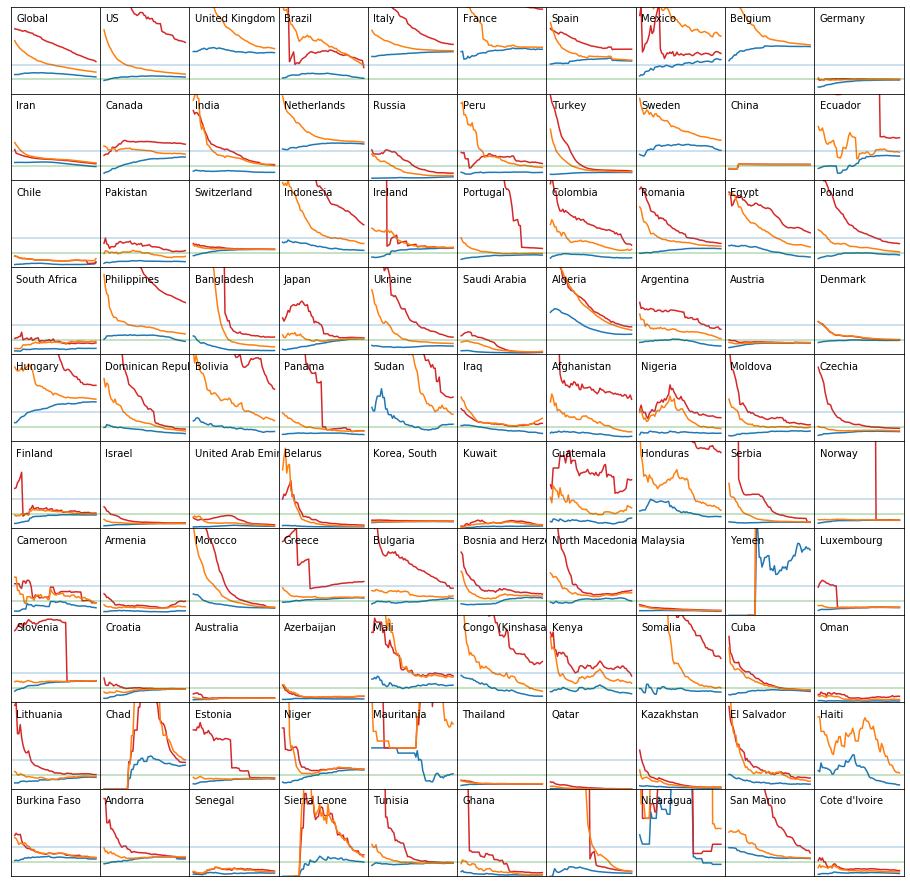

In [18]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(16, 16), sharey=True)
fig.subplots_adjust(hspace = 0, wspace=0)
axs = ax.ravel()
    
for i, country in enumerate(list(death)[:100]):
    axs[i].plot(cfr_t[country].values[-60:], c='C0')
    axs[i].plot(cfr_c[country].values[-60:], c='C3')
    axs[i].plot(cfr_o[country].values[-60:], c='C1')
    
    axs[i].axhline(y=0.1, c='C0', alpha=0.3)
    axs[i].axhline(y=0.05, c='green', alpha=0.3)
#     axs[i].axhline(y=0.01, c='yellow', alpha=0.3)
    axs[i].set_ylim(top=0.3, bottom=0)
    axs[i].annotate(country, xy=(1, 0.25))

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Colombia

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/sebaxtian/colombia_covid_19_pipe/master/input/covid19co_official.csv',
                parse_dates=[1,12,13,14,15])

In [22]:
list(df)

['ID de caso',
 'Fecha de notificación',
 'Código DIVIPOLA',
 'Ciudad de ubicación',
 'Departamento o Distrito ',
 'atención',
 'Edad',
 'Sexo',
 'Tipo',
 'Estado',
 'País de procedencia',
 'FIS',
 'Fecha de muerte',
 'Fecha diagnostico',
 'Fecha recuperado',
 'fecha reporte web',
 'Tipo recuperación',
 'Codigo departamento',
 'Codigo pais',
 'Pertenencia etnica',
 'Nombre grupo etnico']

In [29]:
diff_diag_notifi = (df['Fecha diagnostico'] - df['Fecha de notificación']).dt.days

In [40]:
(df['Fecha de muerte'] - df['Fecha diagnostico']).dt.days.median()

-1.0

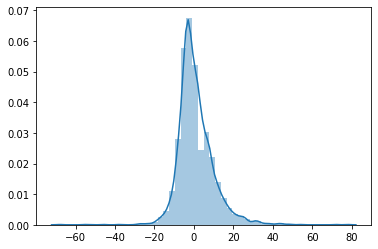

In [41]:
import seaborn as sns
sns.distplot((df['Fecha de muerte'] - df['Fecha diagnostico']).dt.days)